## Resumo aula 2 de Machine Learning ##

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Exercício ##
1a - Construa um modelo de Regressão Linear para prever o preço das casas do USA Housing (enviado no discord)

1b - Pesquise sobre as métricas para algoritmos de regressão. Avalie a métrica R² do modelo, e também discuta se o modelo de preços é um modelo que faria sentido em produção


In [27]:
house_ds = pd.read_csv('../datasets/usa_housing.csv')

In [28]:
# Verificando os dados
house_ds.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [29]:
house_ds.info()
# Verificando tipo dos dados e se há dados nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [30]:
house_ds.describe()
# verificando alguns dados estatísticos dos dados

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [31]:
numeric = house_ds.select_dtypes(include = 'number')
x = numeric.drop(columns='Price')
y = numeric['Price']
# Separando as features do target 'Price'

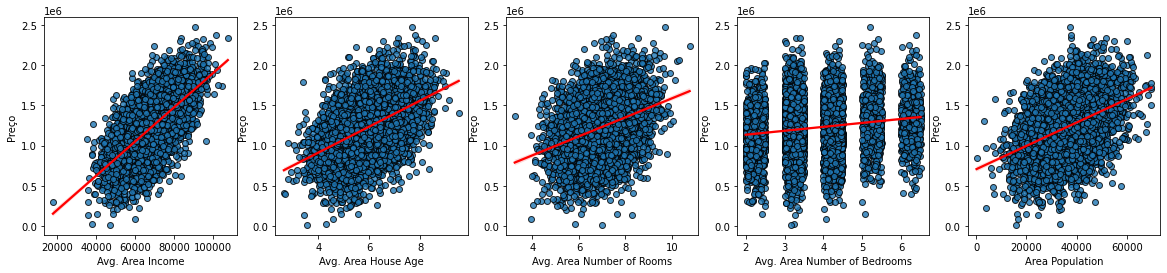

In [32]:
features = x.columns[:]

n_features = len(features)
plt.figure(figsize=(4 * n_features, 4))

for i, feature in enumerate(features):
    'loop para plotar os gráficos de regressão'
    plt.subplot(1, n_features, i+1)
    sns.regplot(x=feature, y=y, data=house_ds ,line_kws={'color': 'red'}, scatter_kws={'edgecolor': 'black'})
    plt.xlabel(feature)
    plt.ylabel('Preço')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42 )
# Realizando a divisão entre dados de treino e teste

In [34]:
estimator = LinearRegression()
estimator.fit(x_train, y_train)
# Ajustando o estimador com os dados da base


LinearRegression()

In [35]:
y_predict = estimator.predict(x_test)
train_predict = estimator.predict(x_train)
test_r2_score = r2_score(y_test, y_pred = y_predict)
train_r2_score = r2_score(y_train, train_predict)
test_mse_score = mean_squared_error(y_test, y_pred = y_predict)
train_mse_score = mean_squared_error(y_train, train_predict)
test_mae_score = mean_absolute_error(y_test, y_pred = y_predict)
train_mae_score = mean_absolute_error(y_train, train_predict)

print(f"""R2 Test Score: {test_r2_score}
R2 Train Score: {train_r2_score}
MSE Test Score: {test_mse_score}
MSE Train Score: {train_mse_score}
MAE Test Score: {test_mae_score}
MAE Train Score: {train_mae_score}""")

# Verificando o resultado das predições
# O modelo apresentou bom resultado no treino e no teste do modelo, mas para dizer se faria sentido a produção do modelo,
# seria necessário realizar mais estudos com outros dados fora da base por exemplo, para ver se é adequado para todos os casos.
# E apesar de ser possível verificar certa tendência no gráfico de regressão linear, e isso fazer sentido no mundo real,
# não são só essas variáveis que determinam o preço de uma casa.

R2 Test Score: 0.9146818498754012
R2 Train Score: 0.9192986579075526
MSE Test Score: 10068422551.400927
MSE Train Score: 10287043161.197224
MAE Test Score: 81135.5660933688
MAE Train Score: 81480.49973174906


## Exercício ##
2a - Construa um modelo de Regressão Logistica para classificar os penguins por espécie e depois por ilha

2b - Pesquise sobre as métricas de comparação de modelos de classificação. Compare ambos em relação as suas métricas e discuta qual deles está performando melhor (podem abstrair que estão fazendo classificações diferentes!)

In [36]:
penguin_ds = sns.load_dataset('penguins')
# carregando o dataset

In [37]:
penguin_ds.info()
# verificando dados nulos e tipo dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [38]:
penguin_ds.dropna(inplace=True)
# como são relativamente poucos dados, escolhi removê-los

In [39]:
penguin_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [40]:
penguin_ds.describe()
# verificando alguns dados estatísticos dos dados

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [41]:
y_island = penguin_ds['island']
y_species = penguin_ds['species']
X = penguin_ds.select_dtypes(include = 'number')
X2 = X.copy()
# Separando as features dos targets


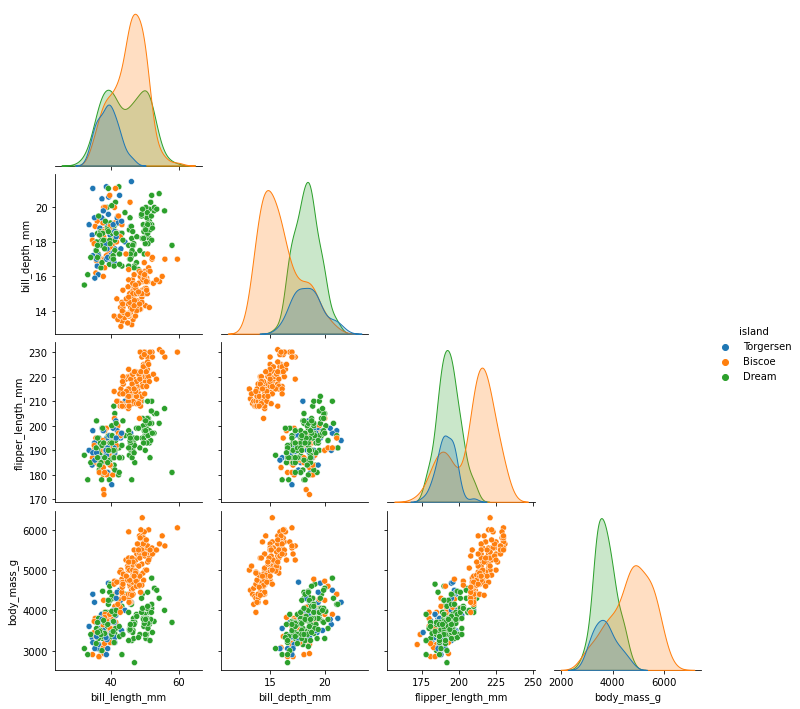

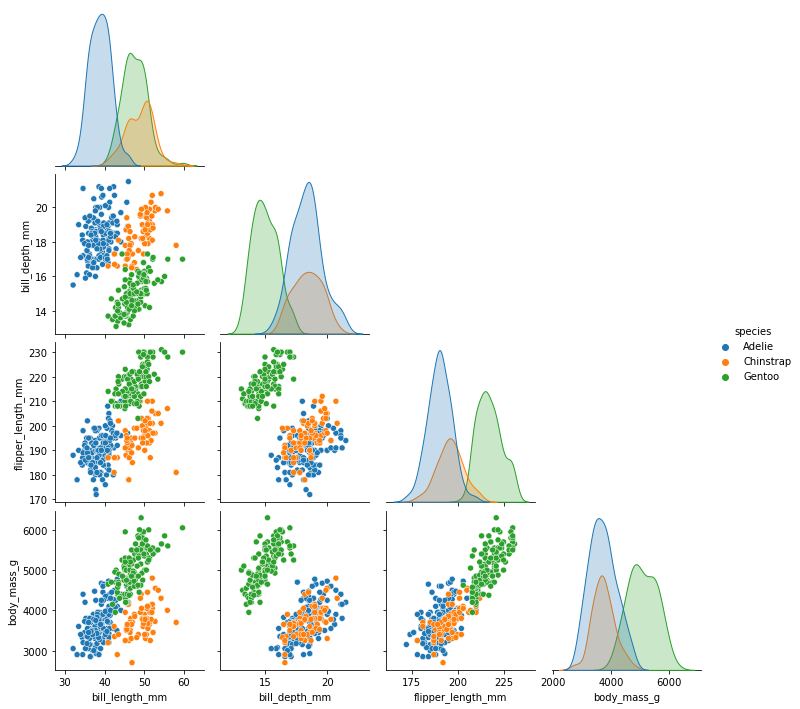

In [42]:
sns.pairplot(penguin_ds, hue='island',corner=True)
sns.pairplot(penguin_ds, hue='species',corner=True)


In [43]:
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y_species)
model.fit(x_train,y_train)

c:\Users\vitor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
species_predict = model.predict(x_test)
print(classification_report(y_test, species_predict))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        37
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.98        84
weighted avg       0.99      0.99      0.99        84



In [45]:
species_predict_train = model.predict(x_train)
print(classification_report(y_train, species_predict_train))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       109
   Chinstrap       0.98      0.98      0.98        55
      Gentoo       1.00      1.00      1.00        85

    accuracy                           0.99       249
   macro avg       0.99      0.99      0.99       249
weighted avg       0.99      0.99      0.99       249



In [55]:
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X2, y_island)
model.fit(x_train,y_train)
island_predict = model.predict(x_test)
island_train_predict = model.predict(x_train)

c:\Users\vitor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
island_predict = model.predict(x_test)
print(classification_report(y_test, island_predict))

              precision    recall  f1-score   support

      Biscoe       0.86      0.76      0.81        41
       Dream       0.59      0.79      0.68        29
   Torgersen       0.56      0.36      0.43        14

    accuracy                           0.70        84
   macro avg       0.67      0.64      0.64        84
weighted avg       0.72      0.70      0.70        84



In [57]:
island_predict_train = model.predict(x_train)
print(classification_report(y_train, island_predict_train))

              precision    recall  f1-score   support

      Biscoe       0.82      0.79      0.80       122
       Dream       0.65      0.81      0.72        94
   Torgersen       0.33      0.15      0.21        33

    accuracy                           0.71       249
   macro avg       0.60      0.58      0.58       249
weighted avg       0.69      0.71      0.69       249



O modelo que previa a espécie se desempenhou melhor em todas as métricas observadas